In [65]:
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.insert(0, 'python/')
from python.utils import *
from python.protocol import Protocol

In [66]:
X, y = make_data(N_samples=1000, seed=42)

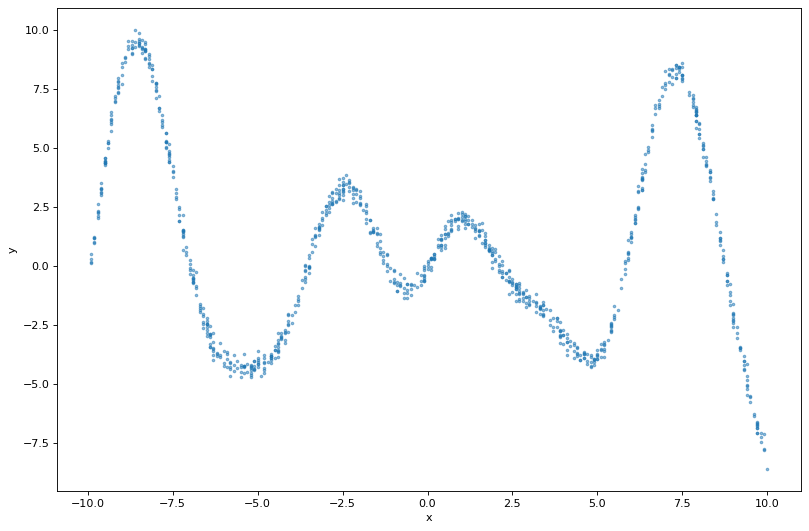

In [67]:
plot_data(X, y)
plt.show()

## *step (i)*

In [68]:
n_LS = 10
N_samples = 10000

X, y = make_data(N_samples=N_samples*n_LS, scale=0.5)

## *step (i) -> (vi)*

In [69]:
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

p = Protocol(X, y, n_LS, [Ridge(alpha=1.0), KNeighborsRegressor(n_neighbors=10)])

In [70]:
noise = p.get_noise()

In [71]:
var, bias_2 = p.get_variance_bias()

In [72]:
error = p.get_expected_error()

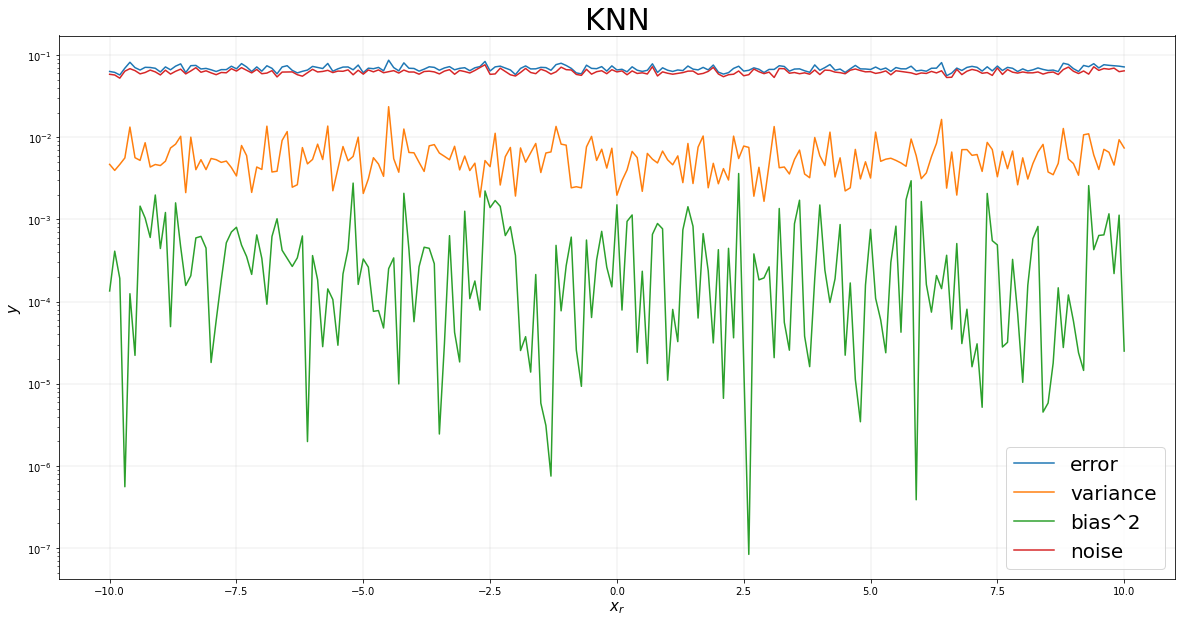

In [73]:
model = 0# [0, 1]
model_name = ["Ridge", "KNN"]
plt.figure(figsize=(20, 10))
plt.plot(p.get_unique(), error[model])
plt.plot(p.get_unique(), var[model])
plt.plot(p.get_unique(), bias_2[model])
plt.plot(p.get_unique(), noise)
plt.legend(["error", "variance", "bias^2", "noise"], fontsize=20)
plt.xlabel('$x_r$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.title(model_name[model], fontsize=30)
plt.grid(True, linewidth=.2)
plt.yscale("log")


In [74]:
np.mean(noise[model]), np.mean(var[model]), np.mean(error[model])

(0.05735005744325632, 0.0059087539364461655, 0.06885253435704254)